# Datacollection

## Context

This file will import some data and run EDA given an array of tickers

In [4]:
#COMMON
import pandas as pd #standard https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe
import numpy as np #standard https://numpy.org/doc/stable/user/index.html#user
import datetime #date and time stuff https://docs.python.org/3/library/datetime.html

#EDA
import sweetviz as sw #1-line EDA https://pypi.org/project/sweetviz/

#VIZ
import matplotlib.pyplot as plt #graphing/viz https://matplotlib.org/stable/index.html
import plotly.express as px #graphing/viz https://plotly.com/python-api-reference/plotly.express.html
%matplotlib inline
import seaborn as sns #graphing/viz https://seaborn.pydata.org/
import altair as alt #graphing/viz https://altair-viz.github.io/

#FINANCE
import pandas_datareader.data as web #remote data access https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
import pandas_datareader as pdr #remote data access https://pandas-datareader.readthedocs.io/en/latest/
import ffn #financial functions https://pmorissette.github.io/ffn/#
import yfinance as yf #yahoo finance api https://python-yahoofinance.readthedocs.io/en/latest/api.html

#TIMESERIES

#ML


## Access data, view, and do some house cleaning

### Get stock

In [14]:
stock = 'MSFT'
timeframe = '5y'

stock = yf.Ticker(stock).history(period=timeframe)
stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-14 00:00:00-05:00,212.127563,213.650413,209.013099,209.288193,29480800,0.0,0.0
2021-01-15 00:00:00-05:00,209.779436,210.752083,208.315534,208.924667,31746500,0.0,0.0
2021-01-19 00:00:00-05:00,210.005392,213.178803,208.905018,212.648270,30480900,0.0,0.0
2021-01-20 00:00:00-05:00,213.886191,221.834461,213.483370,220.409866,37777300,0.0,0.0
2021-01-21 00:00:00-05:00,220.763580,222.335557,218.523524,221.028854,30709400,0.0,0.0
...,...,...,...,...,...,...,...
2023-01-09 00:00:00-05:00,226.449997,231.240005,226.410004,227.119995,27369800,0.0,0.0
2023-01-10 00:00:00-05:00,227.759995,231.309998,227.330002,228.850006,27033900,0.0,0.0
2023-01-11 00:00:00-05:00,231.289993,235.949997,231.110001,235.770004,28669300,0.0,0.0


### Removing unnecessary data in the datetimes index

In [31]:
stock.index

DatetimeIndex(['2021-01-14 00:00:00-05:00', '2021-01-15 00:00:00-05:00',
               '2021-01-19 00:00:00-05:00', '2021-01-20 00:00:00-05:00',
               '2021-01-21 00:00:00-05:00', '2021-01-22 00:00:00-05:00',
               '2021-01-25 00:00:00-05:00', '2021-01-26 00:00:00-05:00',
               '2021-01-27 00:00:00-05:00', '2021-01-28 00:00:00-05:00',
               ...
               '2022-12-30 00:00:00-05:00', '2023-01-03 00:00:00-05:00',
               '2023-01-04 00:00:00-05:00', '2023-01-05 00:00:00-05:00',
               '2023-01-06 00:00:00-05:00', '2023-01-09 00:00:00-05:00',
               '2023-01-10 00:00:00-05:00', '2023-01-11 00:00:00-05:00',
               '2023-01-12 00:00:00-05:00', '2023-01-13 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=504, freq=None)

In [33]:
stock.index = stock.index.strftime('%Y-%m-%d')

In [35]:
stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-14,212.127563,213.650413,209.013099,209.288193,29480800,0.0,0.0
2021-01-15,209.779436,210.752083,208.315534,208.924667,31746500,0.0,0.0
2021-01-19,210.005392,213.178803,208.905018,212.648270,30480900,0.0,0.0
2021-01-20,213.886191,221.834461,213.483370,220.409866,37777300,0.0,0.0
2021-01-21,220.763580,222.335557,218.523524,221.028854,30709400,0.0,0.0
...,...,...,...,...,...,...,...
2023-01-09,226.449997,231.240005,226.410004,227.119995,27369800,0.0,0.0
2023-01-10,227.759995,231.309998,227.330002,228.850006,27033900,0.0,0.0
2023-01-11,231.289993,235.949997,231.110001,235.770004,28669300,0.0,0.0


### See if close is actually adj. close (adjusted for dividends and stock splits)

from yahoo finance we can see that on the 16th of November 2022, there was a dividend. i.e., adj. close and close deviate before that date. the data show that the number should be equal to 241.29, let's check

In [42]:
rows = stock.loc['2022-11-15']
print(rows)

Open            2.449696e+02
High            2.463059e+02
Low             2.393555e+02
Close           2.412900e+02
Volume          3.139010e+07
Dividends       0.000000e+00
Stock Splits    0.000000e+00
Name: 2022-11-15, dtype: float64


the number is correct - so we can use the close column as an actual price that is adjusted for dividends and splits etc.

## Central Limit Theorem & Descriptive Statistics

### Extract only the close price from stock

In [52]:
prices = stock['Close']
prices

Date
2021-01-14    209.288193
2021-01-15    208.924667
2021-01-19    212.648270
2021-01-20    220.409866
2021-01-21    221.028854
                 ...    
2023-01-09    227.119995
2023-01-10    228.850006
2023-01-11    235.770004
2023-01-12    238.509995
2023-01-13    239.229996
Name: Close, Length: 504, dtype: float64

### Summary statistics - note these are not very valuable untill further EDA is done!

In [53]:
prices.describe()

count    504.000000
mean     270.193397
std       31.289740
min      208.924667
25%      243.815670
50%      266.121552
75%      293.330940
max      339.924866
Name: Close, dtype: float64

Find sample mean

In [54]:
prices.mean()

270.19339691646513

Find median

In [57]:
prices.median()

266.1215515136719

Find mode

In [56]:
prices.mode()

0    233.581741
1    252.829330
2    291.579407
3    297.333191
Name: Close, dtype: float64

#### Create histogram of returns

calculate returns

In [59]:
prices_return=prices.pct_change(1)
prices_return

Date
2021-01-14         NaN
2021-01-15   -0.001737
2021-01-19    0.017823
2021-01-20    0.036500
2021-01-21    0.002808
                ...   
2023-01-09    0.009736
2023-01-10    0.007617
2023-01-11    0.030238
2023-01-12    0.011621
2023-01-13    0.003019
Name: Close, Length: 504, dtype: float64

In [81]:
prices_return.describe()

count    503.000000
mean       0.000435
std        0.018428
min       -0.077156
25%       -0.009049
50%        0.000000
75%        0.011666
max        0.082268
Name: Close, dtype: float64

Create histogram - we use Sturge's rule for # of bins

In [105]:
sturge = round(1+3.22*np.log(prices.shape[0]),1)
sturge

21.0

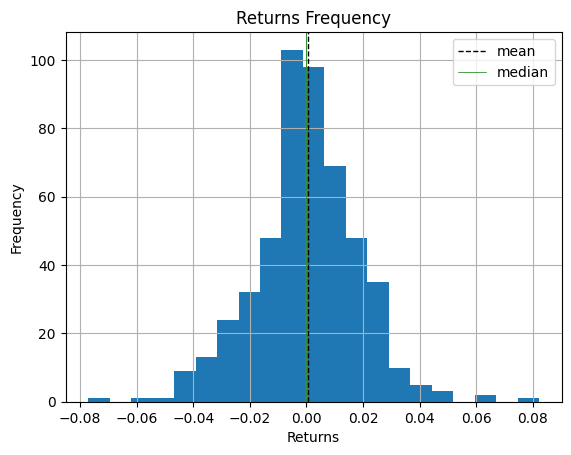

In [99]:
prices_return.hist(bins=21);
_ = plt.xlabel('Returns')
_ = plt.ylabel('Frequency')
_ = plt.title('Returns Frequency')
_ = plt.axvline(prices_return.mean(), color='k', linestyle='dashed', linewidth=1, label ='mean')
_ = plt.axvline(prices_return.median(), color='g', linewidth=0.5,label='median')
plt.legend();

#### Create box plot of close price

<AxesSubplot: xlabel='Close'>

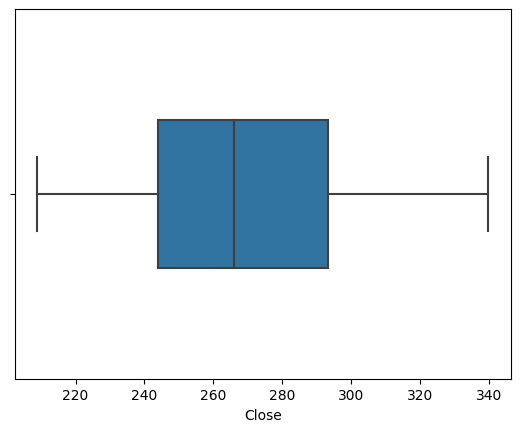

In [104]:
sns.boxplot(x=prices, width = 0.4)

#### Skew and kurtosis

Skew: Skewness is a valuable metric for determining the absence of symmetry since it is crucial to comprehend symmetry. When discussing skewness, it is possible for the information to be skewed to the left, to the right, or to the centre.

In [91]:
skew = prices_return.skew()
print(skew)
if skew > 0:
    print("returns are skewed to the right")
else:
    print("returns are skewed to the left")

-0.01861474740902537
returns are skewed to the left


Kurtosis: Kurtosis is the measure of the tails in a normal distribution. A high kurtosis is related to having heavy tails, which means outliers. A low kurtosis means lack of outliers which is light tails. It is uncommon to have a uniform distribution.

There are three options of kurtosis for interpreting the result.

- Leptokurtic: the value of kurtosis is greater than (>) than zero. The interpretation is that the data is centered around the mean.

- Mesokurtic: the value of the kurtosis is equal (=) to zero. This represents a normal distribution

- Platykurtic: the value of the kurtosis is less than zero.The interpretation is that the data is far from the mean

In [98]:
kurt = prices_return.kurtosis()
print(kurt)
if kurt > 0:
    print("returns are centered around the mean")
if kurt == 0:
    print("returns are normally distributed")
if kurt < 0:
    print("returns are far from the mean")

1.6005151051463908
returns are centered around the mean
